In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\akgh1\Desktop\AI_project\Flight_Price_Dataset_Q2.csv")
data.tail(10)

,departure_time,stops,arrival_time,class,duration,days_left,price
270128,Evening,one,Night,Business,6.58,49,51345
270129,Morning,one,Night,Business,13.67,49,51345
270130,Evening,one,Morning,Business,16.00,49,51345
270131,Evening,one,Morning,Business,18.92,49,51345
270132,Early_Morning,one,Morning,Business,26.83,49,51345
270133,Early_Morning,one,Night,Business,17.25,49,68739
270134,Morning,one,Evening,Business,10.08,49,69265
270135,Afternoon,one,Night,Business,10.42,49,77105
270136,Early_Morning,one,Evening,Business,10.00,49,81585
270137,Morning,one,Evening,Business,10.08,49,81585


In [3]:
data['stops'].value_counts()

stops
one            225767
zero            32466
two_or_more     11905
Name: count, dtype: int64

In [4]:
mapping = {'zero': 0,
           'one' : 1,
           'two_or_more' : 2}

data['stops_num'] = data['stops'].map(mapping)
data['stops_num'].value_counts()

stops_num
1    225767
0     32466
2     11905
Name: count, dtype: int64

In [5]:
label_encoder = LabelEncoder()

data['arrival_time_num'] = label_encoder.fit_transform(data['arrival_time'])
data['class_num'] = label_encoder.fit_transform(data['class'])
data['departure_time_num'] = label_encoder.fit_transform(data['departure_time'])
print(data['arrival_time_num'].value_counts())
print(data['class_num'].value_counts())
print(data['departure_time_num'].value_counts())

arrival_time_num
5    82413
2    70494
4    56438
0    34274
1    13889
3    12630
Name: count, dtype: int64
class_num
1    185998
0     84140
Name: count, dtype: int64
departure_time_num
4    64036
1    60112
2    58586
5    43267
0    42951
3     1186
Name: count, dtype: int64


In [6]:
data

,departure_time,stops,arrival_time,class,duration,days_left,price,stops_num,arrival_time_num,class_num,departure_time_num
0,Evening,zero,Night,Economy,2.17,1,5953,0,5,1,2
1,Early_Morning,zero,Morning,Economy,2.33,1,5953,0,4,1,1
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,0,1,1,1
3,Morning,zero,Afternoon,Economy,2.25,1,5955,0,0,1,4
4,Morning,zero,Morning,Economy,2.33,1,5955,0,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,Business,17.25,49,68739,1,5,0,1
270134,Morning,one,Evening,Business,10.08,49,69265,1,2,0,4
270135,Afternoon,one,Night,Business,10.42,49,77105,1,5,0,0
270136,Early_Morning,one,Evening,Business,10.00,49,81585,1,2,0,1


In [8]:
X = data[['departure_time_num', 'stops_num', 'arrival_time_num', 'class_num', 'duration', 'days_left']]
Y = data['price']
X

,departure_time_num,stops_num,arrival_time_num,class_num,duration,days_left
0,2,0,5,1,2.17,1
1,1,0,4,1,2.33,1
2,1,0,1,1,2.17,1
3,4,0,0,1,2.25,1
4,4,0,4,1,2.33,1
...,...,...,...,...,...,...
270133,1,1,5,0,17.25,49
270134,4,1,2,0,10.08,49
270135,0,1,5,0,10.42,49
270136,1,1,2,0,10.00,49


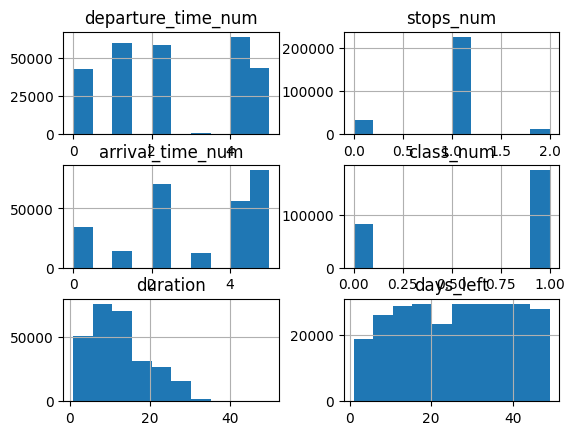

In [13]:
viz = X[['departure_time_num', 'stops_num', 'arrival_time_num', 'class_num', 'duration', 'days_left']]
viz.hist()
plt.show()

In [14]:
X = (X - X.mean()) / X.std()
X['Ones'] = 1
X = X.to_numpy()
Y = Y.to_numpy()
X[1]

array([-0.80857906, -2.32091044,  0.53140093,  0.67258366, -1.37499463,
       -1.84374895,  1.        ])